AI-generated notebook for exploring Dandiset 001363

This notebook was AI-generated using dandi-notebook-gen and has not been fully verified.
Please be cautious when interpreting the code or results.

Introduction

This notebook provides an introduction to Dandiset 001363, "Neural Spiking Data in the Rat Somatosensory Cortex Using a Flexible Electrode Responding to Transcranial Focused Ultrasound".

This study investigates the neuronal response to transcranial focused ultrasound stimulation (tFUS) on the somatosensory cortex using a 128-element array transducer and a chronically implanted ultraflexible nanoelectric thread electrode.

The notebook will guide you through loading the dataset, exploring its structure, accessing and visualizing sample data, and performing some common analyses.

Before using this notebook, you might need to install the following packages:
```bash
pip install pynwb lindi matplotlib seaborn
```

In [1]:
# Use the DANDI API to list all of the assets in the Dandiset
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001363")
assets = list(dandiset.get_assets())
print(f"Found {len(assets)} assets in the Dandiset")

Found 55 assets in the Dandiset


Dataset structure exploration

The Dandiset contains multiple NWB files, each representing a recording session.
Let's explore the structure of one of these files.
We will load the first NWB file in the Dandiset.
If you want to load data from only select files, then you should indicate which files you are using.

In [2]:
import pynwb
import lindi

# Load the first NWB file
nwb_file_url = "https://lindi.neurosift.org/dandi/dandisets/001363/assets/59d1acbb-5ad5-45f1-b211-c2e311801824/nwb.lindi.json"
f = lindi.LindiH5pyFile.from_lindi_file(nwb_file_url)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Print some basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

Session description: Rat Ultrasound Array Stimulation
Identifier: BH589_1500_200_67_25V
Session start time: 2024-08-27 16:04:57-04:00


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Accessing and visualizing sample data

Now that we have loaded the NWB file, let's access and visualize some of the data.
We'll start by plotting the raw data from the first electrode.

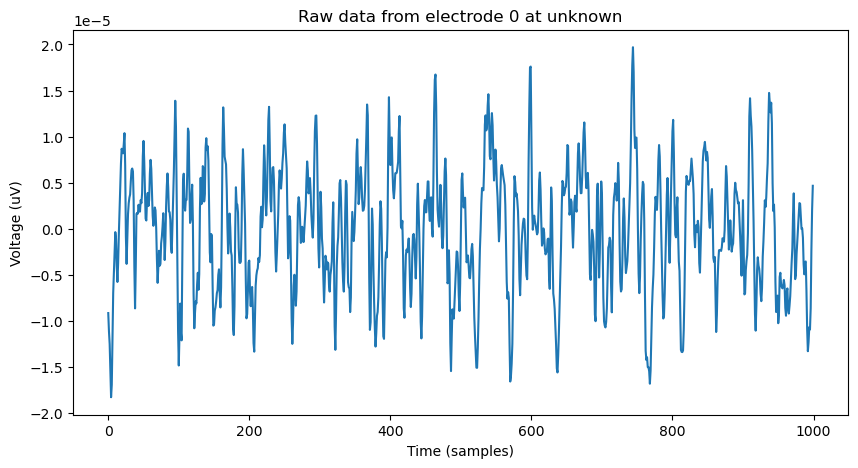

Electrode ID: 0
Electrode Location: unknown


In [3]:
import matplotlib.pyplot as plt
import numpy as np

ElectricalSeries = nwb.acquisition["ElectricalSeries"]
data = ElectricalSeries.data
electrodes = ElectricalSeries.electrodes

electrode_ids = electrodes["id"].data[:]
electrode_locations = electrodes["location"].data[:]

# Plot the raw data from the first electrode
electrode_index = 0
electrode_id = electrode_ids[electrode_index]
electrode_location = electrode_locations[electrode_index]
raw_data = data[:1000, electrode_index]  # Load a subset of the data

plt.figure(figsize=(10, 5))
plt.plot(raw_data)
plt.xlabel("Time (samples)")
plt.ylabel("Voltage (uV)")
plt.title(f"Raw data from electrode {electrode_id} at {electrode_location}")
plt.savefig("tmp_scripts/plot_raw_electrode_1.png") #Include the plot file in the same directory as the notebook
plt.show()
plt.close()

print(f"Electrode ID: {electrode_id}")
print(f"Electrode Location: {electrode_location}")

The raw data from the first electrode appears to be noise.
Let's plot the power spectral density of the signal to see if we can identify any dominant frequencies or patterns.

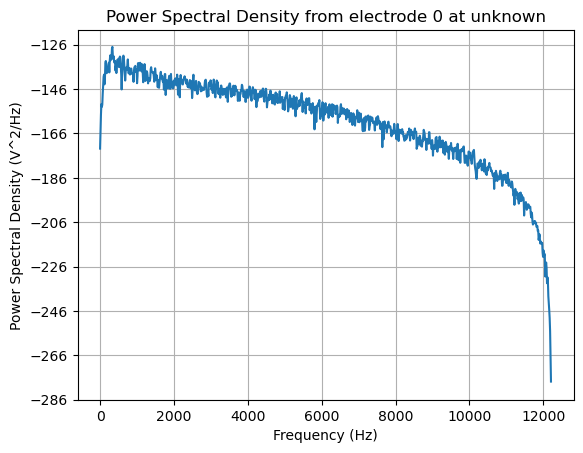

In [4]:
# Plot the power spectral density of the signal from the first electrode
frequencies, power_spectrum = plt.psd(data[:10000, electrode_index], Fs=ElectricalSeries.rate, NFFT=2048)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (V^2/Hz)")
plt.title(f"Power Spectral Density from electrode {electrode_id} at {electrode_location}")
plt.savefig("tmp_scripts/plot_psd_electrode_1.png") #Include the plot file in the same directory as the notebook
plt.show()
plt.close()

The power spectral density plot shows a dominance of lower frequencies in the power spectrum.

Finally, let's plot the trial start and stop times. This information can be used to determine the stimulus timing.

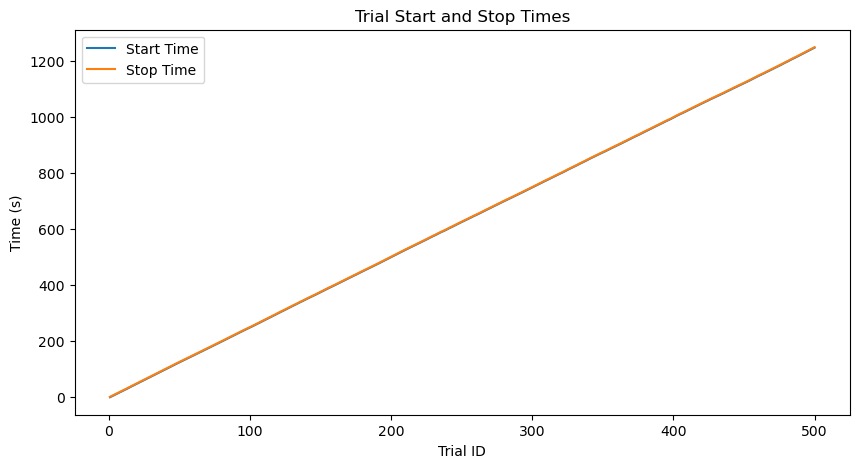

In [5]:
trials = nwb.intervals["trials"]
start_time = trials["start_time"][:]
stop_time = trials["stop_time"][:]
trial_ids = trials["id"][:]

# Create a plot of the trial start and stop times
plt.figure(figsize=(10, 5))
plt.plot(trial_ids, start_time, label="Start Time")
plt.plot(trial_ids, stop_time, label="Stop Time")
plt.xlabel("Trial ID")
plt.ylabel("Time (s)")
plt.title("Trial Start and Stop Times")
plt.legend()
plt.savefig("tmp_scripts/plot_trial_times.png") #Include the plot file in the same directory as the notebook
plt.show()
plt.close()

The trial times plot shows that the start and stop times increase linearly with the trial ID, with a consistent separation between them.
This suggests a stimulus with a fixed or increasing duration is being applied throughout the trials.